In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
index_dic = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    21:"눈살귀구슬수평길이",
    28:"머리수직길이",
    29:"머리마루_아래턱뼈수직길이",
    32:"머리마루_입술수직길이",
    33:"머리마루_코밑수직길이",
    45:"귀구슬입술직선길이"
}

index_dic_feature = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    21:"눈살귀구슬수평길이",
    29:"머리마루_아래턱뼈수직길이",
    32:"머리마루_입술수직길이",
    33:"머리마루_코밑수직길이",
    45:"귀구슬입술직선길이"
}

df_raw = pd.read_excel ("./2010_6th_sort_translated.xlsx")


In [28]:
df = df_raw
for idx in [29,32,33]:
    df.loc[:,index_dic[idx]] = df.loc[:,index_dic[28]]-df.loc[:,index_dic[idx]]
    
col = list(index_dic_feature.values())
df = df.dropna()
df.reset_index(inplace = True,drop = True)
df_features = df[col[2:]]
normalized_df = df_features-df_features.mean()

In [29]:
df_features

,코너비,입너비,아래턱사이너비,코높이,코길이,코뿌리턱끝수직길이,코뿌리코끝수직길이,눈살귀구슬수평길이,머리마루_아래턱뼈수직길이,머리마루_입술수직길이,머리마루_코밑수직길이,귀구슬입술직선길이
0,34.0,55.0,119.0,5.0,51.0,121.0,31.0,75.0,25.0,47.0,70.0,133.0
1,35.0,56.0,105.0,5.0,49.0,100.0,33.0,88.0,10.0,39.0,50.0,126.0
2,28.0,52.0,125.0,6.0,47.0,102.0,28.0,79.0,26.0,37.0,54.0,127.0
3,32.0,56.0,118.0,6.0,46.0,115.0,26.0,64.0,17.0,45.0,70.0,126.0
4,34.0,59.0,123.0,6.0,51.0,114.0,36.0,91.0,28.0,36.0,62.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2049,33.3,45.6,129.0,20.2,49.6,109.9,38.6,108.0,42.8,35.4,60.3,148.9
2050,38.9,47.9,120.0,20.2,51.9,114.2,37.8,94.7,45.4,44.6,62.3,128.7
2051,29.9,38.6,123.2,20.3,49.3,99.2,36.5,98.7,49.6,28.4,49.9,130.7
2052,35.0,48.0,137.0,21.0,61.0,126.0,45.0,102.0,44.0,46.0,65.0,135.0


In [31]:
# Statistics description
df_features.describe()
df_describe = df.groupby("성별/sex").describe()
# df_describe.to_excel("./output.xlsx")  

In [32]:
df_describe

나이/age                                                         코높이  \
         count       mean        std   min   25%   50%   75%   max   count   
성별/sex                                                                       
남       1040.0  44.154808  14.441748  20.0  31.0  44.0  57.0  69.0  1040.0   
여       1014.0  44.474359  14.420728  20.0  32.0  45.0  57.0  69.0  1014.0   

                   ...   입너비       아래턱사이너비                               \
             mean  ...   75%   max   count        mean        std   min   
성별/sex             ...                                                    
남       13.621635  ...  60.0  78.0  1040.0  127.497692  11.455185  90.0   
여       12.065878  ...  55.0  71.0  1014.0  119.260750  11.038406  80.0   

                                    
          25%    50%    75%    max  
성별/sex                              
남       120.0  128.0  135.4  161.0  
여       111.0  120.0  127.6  165.8  

[2 rows x 368 columns]

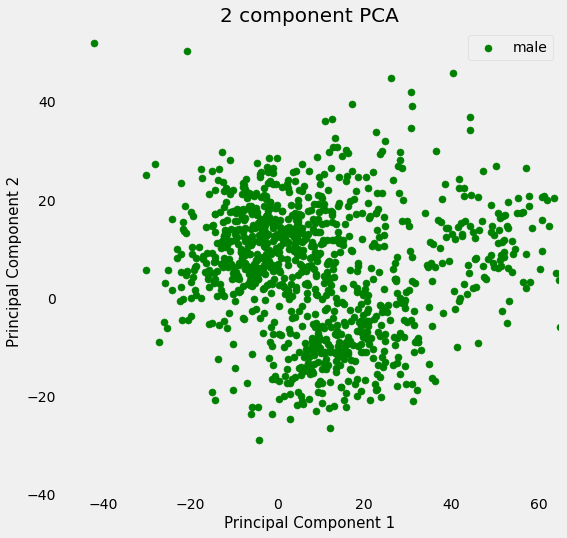

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

finalDf = pd.concat([principalDf, df[["성별/sex"]]], axis = 1)

targets = ['남', '여']
colors = ['r', 'g']

targets = [ '여']
colors = [ 'g']

# targets = ['남']
# colors = ['r']
for target, color in zip(['남','여'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["male","female"])
ax.set_xlim(-50,65)
ax.set_ylim(-40,55)
ax.grid()


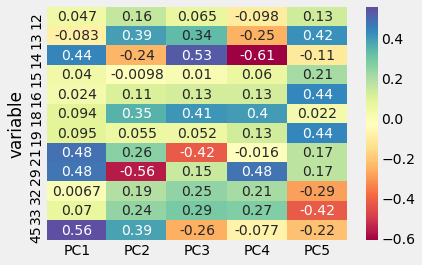

In [35]:
from sklearn.decomposition import PCA
num_pc = 5
pca_out = PCA(n_components=5).fit(normalized_df)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)


loadings = pca_out.components_
num_pc = 5

pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df
loadings_df['variable'] =[12,13,14,15,16,18,19,21,29,32,33,45]
loadings_df = loadings_df.set_index('variable')
loadings_df

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

<BarContainer object of 5 artists>

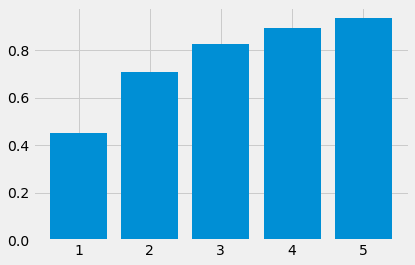

In [36]:
plt.bar([1,2,3,4,5],np.cumsum(pca_out.explained_variance_ratio_))

In [37]:
pca_out.explained_variance_
cluster.screeplot(obj=[np.array(pc_list), np.cumsum(pca_out.explained_variance_ratio_)])

NameError: name 'cluster' is not defined

In [38]:
obj=[np.array(pc_list), pca_out.explained_variance_ratio_]

In [39]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=[12,13,14,15,16,18,19,45], 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

NameError: name 'cluster' is not defined

In [40]:
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=[12,13,14,15,16,18,19,45], 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

NameError: name 'cluster' is not defined

In [41]:
from sklearn.preprocessing import StandardScaler
df_st =  StandardScaler().fit_transform(df)  

pca_scores = PCA(n_components=5)
pca_scores.fit_transform(df_st)

pca_out = PCA(n_components=5).fit(df_st)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)


loadings = pca_out.components_
num_pc = 5

# get 2D biplot
cluster.biplot(cscore=pca_scores,
               loadings=loadings,
               labels=[12,13,14,15,16,18,19,45],
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# # get 3D biplot
# cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
# var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
# var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

ValueError: could not convert string to float: '여'

In [ ]:
df_st

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['남', '여']
colors = ['r', 'g', 'b']
for target, color in zip(['남'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend()
ax.grid()


In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['남', '여']
colors = ['g']
for target, color in zip(['여'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
from sklearn.decomposition import PCA
pca_num = 2
pca = PCA(n_components=pca_num)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = list(range(pca_num)))
principalDf
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
index_dic_feature = {
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    45:"귀구슬입술직선길이"
}
col_feature = list(index_dic_feature.values())
df = pd.DataFrame(data = pca.components_,columns = col_feature)
df.T

In [ ]:
df["나이/age"] = (df["나이/age"]/10).astype(int)*10

In [12]:
df["나이/age"].unique()

array([58, 59, 56, 65, 51, 48, 21, 54, 64, 49, 60, 46, 67, 63, 43, 66, 42,
       33, 34, 20, 40, 53, 55, 41, 61, 57, 62, 44, 52, 47, 45, 35, 31, 32,
       50, 68, 69, 26, 39, 37, 23, 29, 30, 24, 36, 22, 38, 27, 25, 28],
      dtype=int64)

In [13]:
finalDf = pd.concat([principalDf, df["나이/age"]], axis = 1)


NameError: name 'principalDf' is not defined

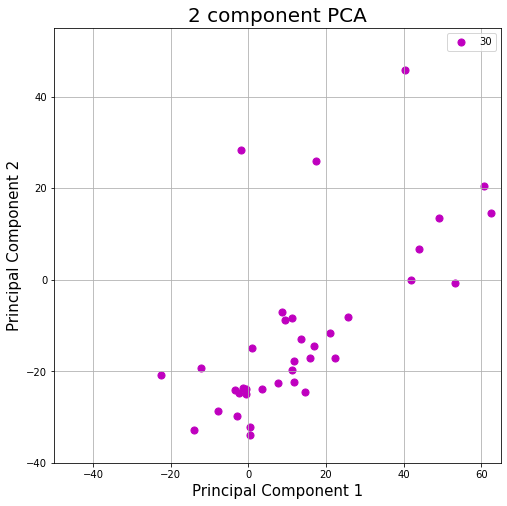

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

finalDf = pd.concat([principalDf, df[["성별/sex"]]], axis = 1)

targets = [50, 60, 40, 20, 30]
colors = ['b', 'g', 'r', 'c', 'm']


targets = [20, 30]
colors = ['c', 'm']

targets = [ 30]
colors = ['m']


# targets = [50, 60, 40]
# colors = ['b', 'g', 'r']

for target,color in zip(targets,colors):
    indicesToKeep = df['나이/age'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.set_xlim(-50,65)
ax.set_ylim(-40,55)
ax.legend(targets)
ax.grid()


1.039131943944678e-91


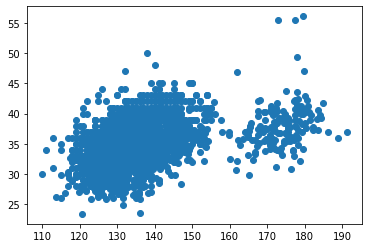

In [15]:
import numpy as np
import scipy.stats
x = df_features["귀구슬입술직선길이"]
y = df_features["코너비"]
result = scipy.stats.linregress(x,y)
print(result.pvalue)
plt.scatter(x,y)

In [16]:
p_value_mtx = np.zeros((8,8))
slope_mtx = np.zeros((8,8))


for i in list(range(8)):
    for j in list(range(8)):
        x = df_features.iloc[:,i]
        y = df_features.iloc[:,j]
        result = scipy.stats.linregress(x,y)
        p_value_mtx[i,j] = result.pvalue
        slope_mtx[i,j] = result.slope
        


In [ ]:

np.savetxt("./p_value_mtx.csv", p_value_mtx, delimiter=",")
np.savetxt("./slope_mtx.csv", slope_mtx, delimiter=",")


### Factor Analysis

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
df_features

In [ ]:
items = df_features.columns.tolist()
items

In [ ]:
fa = FactorAnalyzer(n_factors=4, method="ml", rotation="varimax")
fa.fit(df_features)
efa_result= pd.DataFrame(fa.loadings_, index=[12,13,14,15,16,18,19,21,29,32,33,45])
efa_result

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="bwr", annot=True, fmt='.2f', vmin=-1.2, vmax=1.2)

In [ ]:
fa.get_factor_variance()

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_features)
print("KMO = " + str(kmo_model))

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_features)
chi_square_value, p_value

print("Bartlett's significance value "+  str(p_value))

In [ ]:
fa = FactorAnalyzer()

fa = FactorAnalyzer()
fa.fit(df_features, 25)
eigen_values, vectors = fa.get_eigenvalues()
ev, v = fa.get_eigenvalues()

plt.scatter(range(1,df_features.shape[1]+1),ev)
plt.plot(range(1,df_features.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# > .9 (Excellent), > .8 (Good), > .7 (Acceptable), > .6 (Questionable), > .5(Poor), and < .5 (Unacceptable)
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [ ]:
index_dic = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    45:"귀구슬입술직선길이"
}
factors_items_dict = {}
factors_items_dict[0] = ["코높이","코뿌리코끝수직길이","코길이"]
factors_items_dict[1] = ["코너비","입너비","코뿌리턱끝수직길이"]
factors_items_dict[2] = ["아래턱사이너비","귀구슬입술직선길이"]

for key, value in factors_items_dict.items():
    print(str(key)+": "+str(CronbachAlpha(df_features[value])))


In [ ]:
fa.get_factor_variance()

In [6]:
train = df_features

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
print(train.columns.values)

['코너비' '입너비' '아래턱사이너비' '코높이' '코길이' '코뿌리턱끝수직길이' '코뿌리코끝수직길이' '눈살귀구슬수평길이'
 '머리마루_아래턱뼈수직길이' '머리마루_입술수직길이' '머리마루_코밑수직길이' '귀구슬입술직선길이']


In [9]:
print(train.isna().sum())

코너비              0
입너비              0
아래턱사이너비          0
코높이              0
코길이              0
코뿌리턱끝수직길이        0
코뿌리코끝수직길이        0
눈살귀구슬수평길이        0
머리마루_아래턱뼈수직길이    0
머리마루_입술수직길이      0
머리마루_코밑수직길이      0
귀구슬입술직선길이        0
dtype: int64


In [10]:
kmeans = KMeans(init="random",n_clusters=2, max_iter=600, algorithm = 'auto') 
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[ 35.64567568,  55.28063063, 116.30243243,  12.20738739,
         51.54054054, 113.81576577,  34.4354955 ,  88.62405405,
         21.01918919,  40.72009009,  62.31198198, 132.67801802],
       [ 34.54915254,  46.61927966, 131.81387712,  13.61345339,
         50.65010593, 111.32902542,  36.57891949,  98.61769068,
         42.41101695,  38.03495763,  60.68877119, 142.70572034]])

In [12]:
kmeans.n_iter_

33

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])

NameError: name 'StandardScaler' is not defined

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

index_dic = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    21:"눈살귀구슬수평길이",
    28:"머리수직길이",
    29:"머리마루_아래턱뼈수직길이",
    32:"머리마루_입술수직길이",
    33:"머리마루_코밑수직길이",
    45:"귀구슬입술직선길이"
}

index_dic_feature = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    21:"눈살귀구슬수평길이",
    29:"머리마루_아래턱뼈수직길이",
    32:"머리마루_입술수직길이",
    33:"머리마루_코밑수직길이",
    45:"귀구슬입술직선길이"
}

df_raw = pd.read_excel ("./2010_6th_sort_translated.xlsx")

df = df_raw
for idx in [29,32,33]:
    df.loc[:,index_dic[idx]] = df.loc[:,index_dic[28]]-df.loc[:,index_dic[idx]]
    
col = list(index_dic_feature.values())
df = df.dropna()
df.reset_index(inplace = True,drop = True)
df_features = df[col[2:]]
normalized_df = df_features-df_features.mean()

In [2]:
train = df_features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 600,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(2, 12):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

2
3
4
5
6
7
8
9
10
11


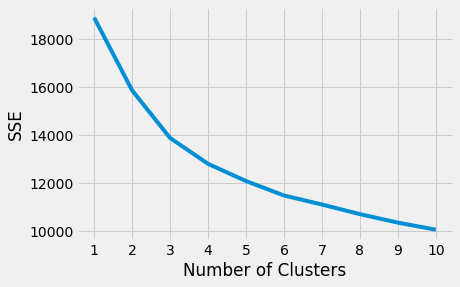

4

In [3]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


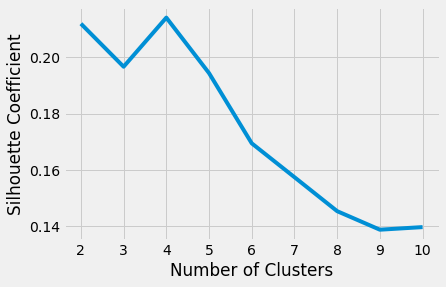

In [4]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_features)
kmeans.labels_

array([0, 0, 0, ..., 1, 2, 2])

No handles with labels found to put in legend.


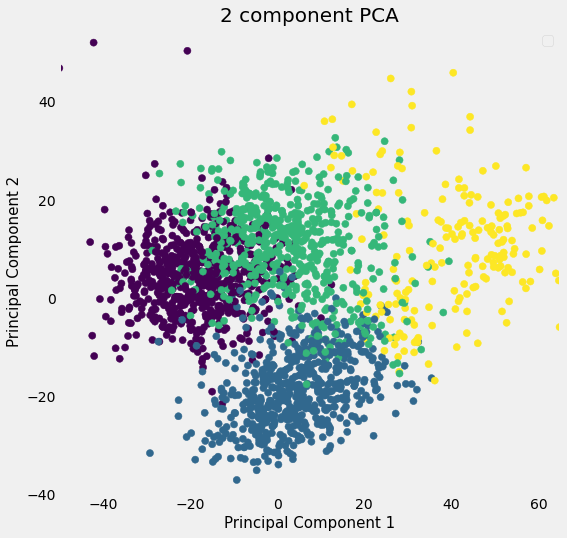

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
                ,c = kmeans.labels_
           , s = 50)
ax.legend()
ax.set_xlim(-50,65)
ax.set_ylim(-40,55)
ax.grid()

In [9]:
principalDf
principalDf["label"] = kmeans.labels_
principalDf

,principal component 1,principal component 2,label
0,-15.637678,5.472831,0
1,-29.866200,4.567292,0
2,-17.232906,-13.042345,0
3,-30.417497,1.381932,0
4,-5.787599,2.317279,0
...,...,...,...
2049,22.340192,-4.360493,1
2050,2.575093,-9.128041,2
2051,6.836738,-27.236562,1
2052,18.521340,-2.255699,2


In [12]:
principalDf.groupby("label").describe()

principal component 1                                              \
                      count       mean        std        min        25%   
label                                                                     
0                     660.0 -18.232499   9.532613 -49.967068 -25.067012   
1                     599.0   4.242756  10.297706 -29.174216  -2.714033   
2                     591.0   2.279723  11.960592 -28.620268  -6.305152   
3                     204.0  39.925107  14.237035   6.228283  28.172666   

                                       principal component 2             \
             50%        75%        max                 count       mean   
label                                                                     
0     -17.719840 -12.009942  12.474542                 660.0   4.299658   
1       4.029618  11.346759  35.453479                 599.0 -18.458614   
2       1.494190  10.252588  39.433197                 591.0  10.290303   
3      41.385466  51.019395  75.706241                 204.0  10.477288   

                                                                         
             std        min        25%        50%        75%        max  
label                                                                    
0       7.788466 -21.544379  -0.657005   4.218620   8.754326  51.971659  
1       7.740577 -37.082411 -24.125855 -18.953769 -13.263668   5.322515  
2       9.290534 -17.599311   4.538037  11.146060  16.690741  32.595598  
3      12.593577 -16.846761   1.606035   9.983904  18.232325  45.837527

In [15]:
df_features["label"] = kmeans.labels_
df_features.groupby("label").describe()

C:\Users\ZAIO\.conda\envs\cv2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


코너비                                                         입너비  \
       count       mean       std   min     25%   50%   75%   max  count   
label                                                                      
0      660.0  34.691667  3.117181  27.0  32.825  35.0  37.0  44.0  660.0   
1      599.0  32.242738  3.015425  23.4  30.000  32.3  34.2  44.0  599.0   
2      591.0  37.683080  3.115133  29.0  35.600  38.0  40.0  50.0  591.0   
3      204.0  37.747549  3.765260  29.8  35.500  37.3  39.8  56.1  204.0   

                  ... 머리마루_코밑수직길이       귀구슬입술직선길이                         \
            mean  ...         75%   max     count        mean        std   
label             ...                                                      
0      54.168485  ...      64.000  76.0     660.0  129.902727   6.314203   
1      42.613022  ...      60.300  71.6     599.0  132.834057   7.055635   
2      58.147547  ...      69.000  91.0     591.0  139.465990   6.613141   
3      47.688725  ...      67.825  82.8     204.0  167.936275  11.899284   

                                            
         min     25%    50%     75%    max  
label                                       
0      110.0  126.00  130.0  134.00  153.6  
1      113.8  128.10  132.3  137.20  162.3  
2      118.0  135.00  139.4  144.00  158.0  
3      140.4  162.45  171.4  177.05  191.1  

[4 rows x 96 columns]

In [28]:
import statsmodels.stats.multicomp as multi
mc1 = multi.MultiComparison(df_features["귀구슬입술직선길이"],df_features["label"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   2.9313 0.001  1.8656   3.997   True
     0      2   9.5633 0.001  8.4938 10.6327   True
     0      3  38.0335 0.001 36.5208 39.5463   True
     1      2   6.6319 0.001   5.537  7.7268   True
     1      3  35.1022 0.001 33.5714 36.6331   True
     2      3  28.4703 0.001 26.9368 30.0038   True
---------------------------------------------------


In [46]:
for key in df_features.columns.values[:-1]:
    df_features_sub = df_features[[key, 'label']]
    model = smf.ols(formula = key+" ~ "+"(label)",data = df_features_sub).fit()
    print(model.summary())
    print("\n\n\n\n\n")

                            OLS Regression Results                            
Dep. Variable:                    코너비   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     312.6
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.20e-65
Time:                        20:14:32   Log-Likelihood:                -5550.2
No. Observations:                2054   AIC:                         1.110e+04
Df Residuals:                    2052   BIC:                         1.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4836      0.123    272.127      0.0

In [38]:
import statsmodels.formula.api as smf

In [36]:
for key in df_features.columns.values[:-1]:
    print(key)
    mc1 = multi.MultiComparison(df_features[key],df_features["label"])
    res1 = mc1.tukeyhsd()
    print(res1.summary())

코너비
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -2.4489 0.001 -2.9071 -1.9907   True
     0      2   2.9914 0.001  2.5316  3.4512   True
     0      3   3.0559 0.001  2.4054  3.7063   True
     1      2   5.4403 0.001  4.9696  5.9111   True
     1      3   5.5048 0.001  4.8466   6.163   True
     2      3   0.0645   0.9 -0.5949  0.7238  False
---------------------------------------------------
입너비
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 -11.5555 0.001 -12.3197 -10.7913   True
     0      2   3.9791 0.001   3.2121    4.746   True
     0      3  -6.4798 0.001  -7.5646  -5.3949   True
     1      2  15.5345 0.001  14.7494  16.3197   True
     1      3   5.0757 0.001   3.9779   6.1735   True
     2      3 -10.4588 0.001 -11.5585  -

In [50]:
df_features.describe().loc["mean"]

코너비               35.141723
입너비               51.299951
아래턱사이너비          123.431353
코높이               12.853603
코길이               51.131305
코뿌리턱끝수직길이        112.672882
코뿌리코끝수직길이         35.420594
눈살귀구슬수평길이         93.217040
머리마루_아래턱뼈수직길이     30.850682
머리마루_입술수직길이       39.486027
머리마루_코밑수직길이       61.565969
귀구슬입술직선길이        137.286660
label              1.165044
Name: mean, dtype: float64

In [61]:
df_features.groupby("label").describe().loc[:,"코너비"].loc[:,"mean"]-df_features.describe().loc["mean"].loc["코너비"]

label
0   -0.450057
1   -2.898986
2    2.541356
3    2.605826
Name: mean, dtype: float64